In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc

Name: Ndiame Ndiaye

Student ID: 260744987

Part 1: Theory

(a) We will compute $h^2$ times the divided difference of of f for $\{-h,-\varepsilon,\varepsilon,h\}$ for $\varepsilon$ close to 0.

$$\lim_{\varepsilon\rightarrow0}h^2f[-h,-\varepsilon,\varepsilon,h]=h^2\lim_{\varepsilon\rightarrow0}\frac{f[-h,-\varepsilon,\varepsilon]-f[-\varepsilon,\varepsilon,h]}{2h}$$
$$=h\lim_{\varepsilon\rightarrow0}\frac{f[-h,-\varepsilon,\varepsilon]}{2}-\frac{f[-\varepsilon,\varepsilon,h]}{2}=h\lim_{\varepsilon\rightarrow0}\frac{f[-h,-\varepsilon]-f[-\varepsilon,\varepsilon]}{2h}-\frac{f[-\varepsilon,\varepsilon]-f[\varepsilon,h]}{2h}$$
$$=\lim_{\varepsilon\rightarrow0}\frac{f[-h,-\varepsilon]}{2}-\frac{f[-\varepsilon,\varepsilon]}{2}-\frac{f[-\varepsilon,\varepsilon]}{2}+\frac{f[\varepsilon,h]}{2}=\frac{f[-h,-0]}{2}+\frac{f[0,h]}{2}-\lim_{\varepsilon\rightarrow0}f[-\varepsilon,\varepsilon]$$
$$\frac{f(h)-f(0)}{2h}+\frac{f(0)-f(-h)}{2h} -f'(0)=\frac{f(h)-f(-h)}{2h}-f'(0)$$

Thus we have the following:

$$\tilde{D}_h-f'(0)=\frac{f(h)+\delta f(h)-f(-h)-\delta f(-h)}{2h}-f'(0)$$
$$=\frac{f(h)-f(-h)}{2h}-f'(0)+\frac{\delta f(h)-\delta f(-h)}{2h}=\lim_{\varepsilon\rightarrow0}h^2*f[-h,-\varepsilon,\varepsilon,h]+\frac{\delta f(h)-\delta f(-h)}{2h}$$

Using the properties of the divided difference, we can find $\xi_\varepsilon\in(-h,h)$ such that: $$\frac{f'''(\xi_\varepsilon)}{6}=f[-h,-\varepsilon,\varepsilon,h]$$
This $\xi_\varepsilon$ can be found for any $\varepsilon=\frac{1}{n}$, thus taking the sequence $(\xi_{\frac{1}{n}})_n$, by making $n$ tend to $\infty$ and by continuity of f, we get a limit $\xi$ such that $$\tilde{D}_h-f'(0)=h^2\frac{f'''(\xi)}{6}+\frac{\delta f(h)-\delta f(-h)}{2h}$$

(b) We will take $\varepsilon=0.1$ and $M=2$ for the graph

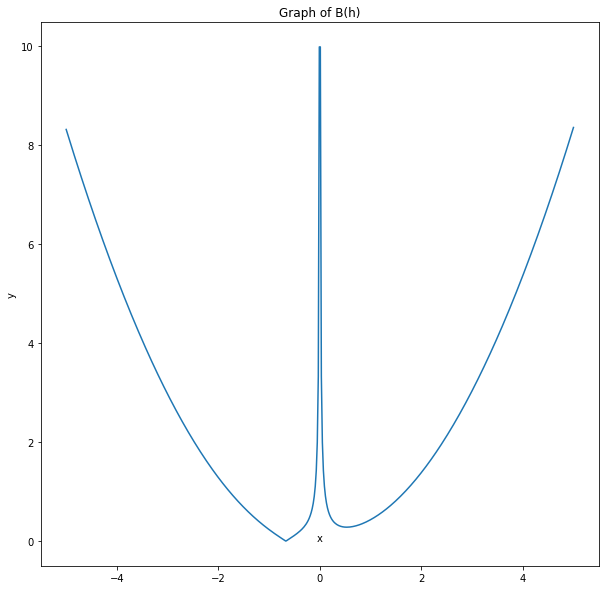

The smallest one is attained at index 216


In [2]:
epsilon=0.1
M=2
xlist = np.linspace(-5, 5, 500)
ylist = [np.absolute(epsilon/i+M*(i*i)/6) for i in xlist]
fig = plt.figure(figsize=(10,10))
smallest=-1
index=0
for j in range(500):
    if(ylist[j]<smallest or smallest==-1):
        smallest=ylist[j]
        index=j
ax1 = fig.add_subplot(111)
ax1.plot(xlist,ylist)
ax1.set_title("Graph of B(h)")
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
plt.show()
print('The smallest one is attained at index %d'%index)

As we can see in the graph above, the minimum isn't attained when we are close to 0, this is because of $\frac{\varepsilon}{h}$ which tends to infinity when $h$ tends to 0. This means we must take h sufficiently large to minimize it but sufficiently small to minimize $\frac{Mh^2}{6}$

Part 2: Lab

We will show the differences between the 3 approaches on the cosine function 

All our polynomials will be of degree 6.

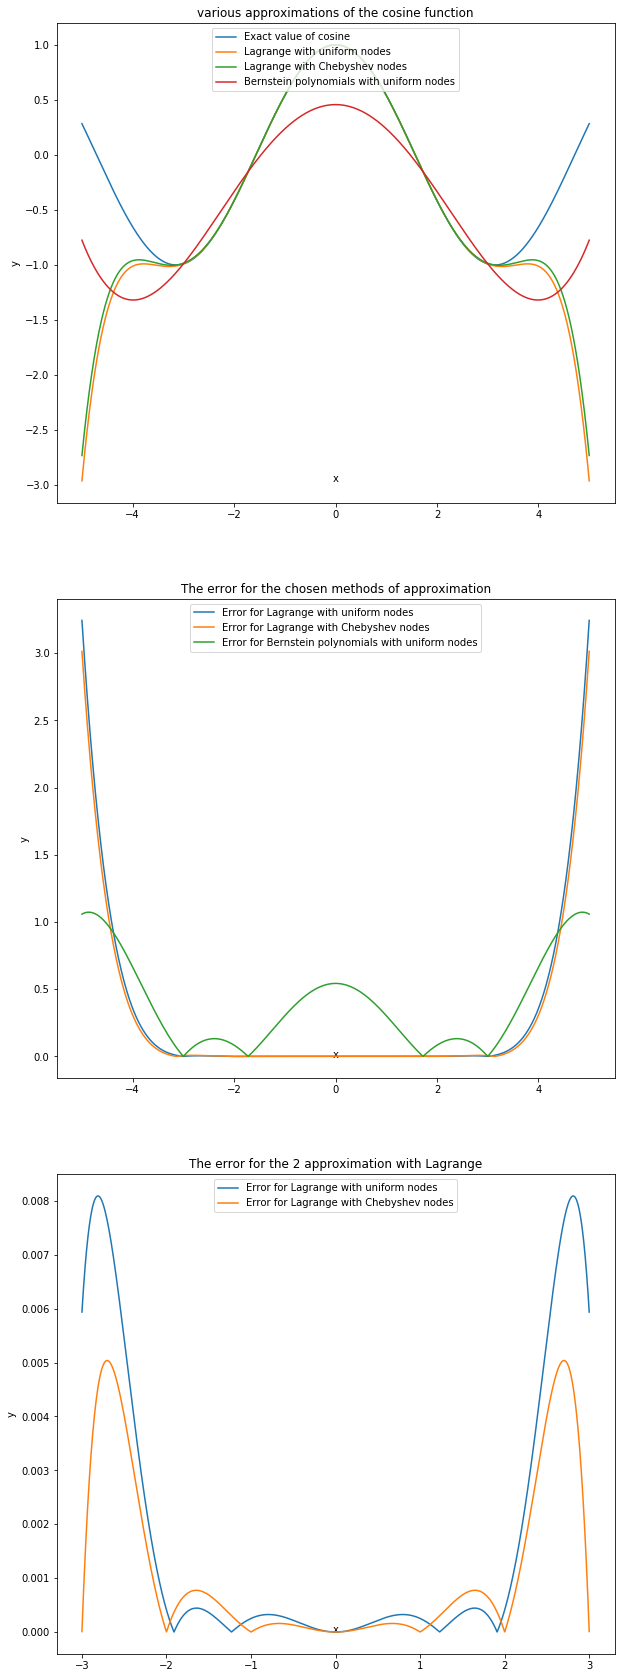

In [3]:
a=-3
b=3
#a=-1
#b=1
n=6
xlist = np.linspace(-5, 5, 10000)
xlist2 = np.linspace(-3, 3, 6000) #This is used to show the Runge phenomenon for the first 2 approximations.
ylist = [np.cos(i) for i in xlist]
subset13 = [a+(b-a)/n*i for i in range(n+1)] #This is the subset used for problems 1 and 3.
values=[-1+2*i/3 for i in range(3)]
subset2=[-np.arccos(y) for y in values]+[0]+[np.arccos(y) for y in values]
problem1list=[]
fListProblem13=[np.cos(x) for x in subset13]
problem2list=[]
fListProblem2=[np.cos(x) for x in subset2]
problem3list=[]
for x in xlist:
    fun1=0
    fun2=0
    fun3=0
    for i in range(n+1):
        phi1=1
        phi2=1
        phi3=sc.comb(n,i)*np.power((x-a)/(b-a),i)*np.power((b-x)/(b-a),n-i)
        for j in range(n+1):
            if(j != i):
                phi1=phi1*(x-subset13[j])/(subset13[i]-subset13[j])
                phi2=phi2*(x-subset2[j])/(subset2[i]-subset2[j])
        fun1=fun1+fListProblem13[i]*phi1
        fun2=fun2+fListProblem2[i]*phi2
        fun3=fun3+fListProblem13[i]*phi3
    problem1list.append(fun1)
    problem2list.append(fun2)
    problem3list.append(fun3)
fig = plt.figure(figsize=(10,30))
ax1 = fig.add_subplot(311)
ax1.plot(xlist,ylist,label='Exact value of cosine')
ax1.plot(xlist,problem1list,label='Lagrange with uniform nodes')
ax1.plot(xlist,problem2list,label='Lagrange with Chebyshev nodes')
ax1.plot(xlist,problem3list,label='Bernstein polynomials with uniform nodes')
ax1.set_title("various approximations of the cosine function")
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2 = fig.add_subplot(312)
ax2.plot(xlist,[np.absolute(ylist[i]-problem1list[i]) for i in range(10000)],label='Error for Lagrange with uniform nodes')
ax2.plot(xlist,[np.absolute(ylist[i]-problem2list[i]) for i in range(10000)],label='Error for Lagrange with Chebyshev nodes')
ax2.plot(xlist,[np.absolute(ylist[i]-problem3list[i]) for i in range(10000)],label='Error for Bernstein polynomials with uniform nodes')
ax2.set_title("The error for the chosen methods of approximation")
ax2.xaxis.set_label_coords(.5,.06)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc="upper center")
ax2 = fig.add_subplot(313)
ax2.plot(xlist2,[np.absolute(ylist[i]-problem2list[i]) for i in range(2000,8000)],label='Error for Lagrange with uniform nodes')
ax2.plot(xlist2,[np.absolute(ylist[i]-problem1list[i]) for i in range(2000,8000)],label='Error for Lagrange with Chebyshev nodes')
ax2.set_title("The error for the 2 approximation with Lagrange")
ax2.xaxis.set_label_coords(.5,.06)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc="upper center")
plt.show()

As we can see above, there's a greater error close to the boundary, inside the interval, uniform nodes are less accurate on average than Chebyshev nodes and both are more accurate than Bernstein. However, outside the interval, Bernstein is the most accurate, then Chebyshev nodes are slightly more accurate in this example and uniform nodes are the least precise.